In [ ]:
import math as math                   #https://docs.python.org/3/library/math.html
import matplotlib.pyplot as plt       #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import numpy as np                    #https://numpy.org/doc/stable/
import csv                            #https://docs.python.org/3/library/csv.html
from scipy import stats               #https://docs.scipy.org/doc/scipy/reference/stats.html
from scipy.optimize import curve_fit  #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
import scipy.linalg as la             #https://docs.scipy.org/doc/scipy/reference/linalg.html
from scipy import optimize as opt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec

# Algebra Linear Regression:

<ipython-input-7-e973ef1345af>:52: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])


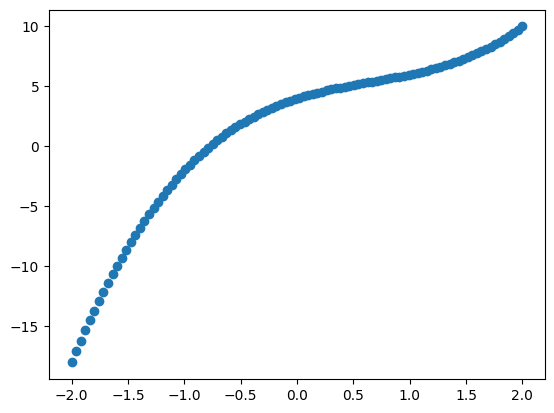

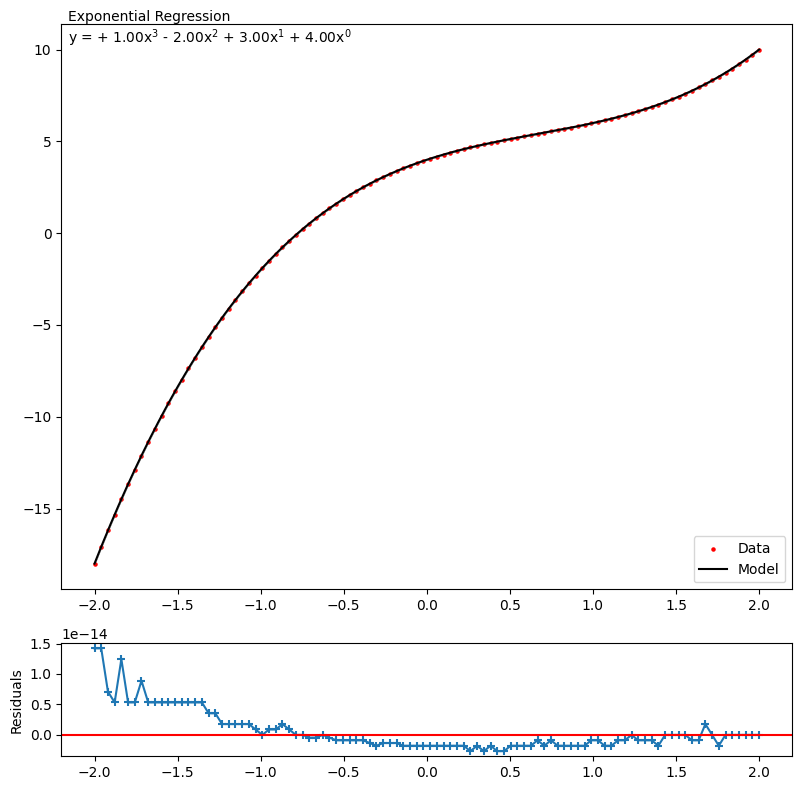

In [ ]:
def linear_regress(x_data, y_data):
    A = np.matrix([x_data, np.full(x_data.size, 1)]).transpose()
    C = np.matrix(y_data).transpose()
    regress = np.linalg.inv(A.T @ A) @ A.T @ C
    slope = regress[0].item()
    intercept = regress[1].item()
    return slope, intercept

def exp_fit(x_data, y_data, power=3, plot=False):
    """
    Fit data with exponetial function
    data: x, y
    p: integer: power of function, default = 3
    plot: default = False

        Returns:
            Regress factor: array
            Model: [x_model, y_model] Data of model
    """

    # A = np.zeros([power + 1, x_data.size])
    # for n in range(power + 1):
    #     A[n, :] = x_data ** (power - n)
    # A = A.transpose()
    A = np.vander(x_data, power + 1)

    C = np.matrix(y_data).transpose()
    regress = np.linalg.inv(A.T @ A) @ A.T @ C
    regress = np.array(regress.transpose())[0, :]

    y_model = np.zeros(x_data.size)
    for index in range(power + 1):
        y_model += regress[index] * x_data ** (power - index)
    model = [x_data, y_model]
    function = 'y = '
    for index in range(power + 1):
        if regress[index] >= 0:
            function += '+ {:0.2f}x$^{:0.0f}$ '.format((regress[index]), power - index)
        else:
            function += '- {:0.2f}x$^{:0.0f}$ '.format(abs(regress[index]), power - index)
    if function[:4:] == '+':
        function = function[:4:] + function[5::]

    if plot:
        x_function = np.linspace(min(x_data), max(x_data), 500)
        y_function = np.zeros(x_function.size)
        for index in range(power + 1):
            y_function += regress[index] * x_function ** (power - index)

        gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1])
        fig, (ax1, _) = plt.subplots(2, 1, figsize=(8,8))
        ax1 = plt.subplot(gs[0])
        ax2 = plt.subplot(gs[1])

        residuals = y_data - y_model
        y_errors = 5 * np.std(residuals)


        ax1.scatter(x_data, y_data, c='r', label='Data', s=5)
        ax1.fill_between(x_function, y_function - y_errors, y_function + y_errors, color='gray', alpha=0.5)
        # ax1.errorbar(x_data, y_data, yerr=y_errors, label='Data',fmt='.',c='r')
        ax1.plot(x_function, y_function, c='k', label='Model')

        ax2.scatter(x_data, y_data - y_model, marker='+')
        ax2.plot(x_data, y_data - y_model)

        ax2.axhline(y=0, color='r', linestyle='-')
        ax2.set_ylabel('Residuals')
        ax1.annotate("Exponential Regression\n" + function, (0, 1), (5, 10), textcoords="offset points",
                     xycoords='axes fraction', ha='left', va='top')
        ax1.legend(loc='lower right')
        plt.tight_layout()
        plt.show()
    return regress, model

x = np.linspace(-2, 2, 100)
# y = 3*x + 4 + np.random.normal(-10, 10, x.size)
y = x**3 - 2*x**2 + 3*x+ 4 #+ np.random.normal(-10, 10, x.size)
# a, b = linear_regress(x,y)
# print(a, b)
# plt.plot(x, a*x + b)
plt.scatter(x,y)
exp_fit(x, y, 3, plot=True)
# print(a,b)

plt.show()

# Gradient descent
Give a function $f(x)$ and its derivative $F(x) = \frac{\delta f(x)}{\delta x}$. For $(x_0, y_0)$ is a point on $f(x)$, and we want to optimize for finding minimum (sometime is maximum), we can track along f(x) by:
<p align="center">
$x_{n+1}=x_{n}-\alpha \frac{\delta f(x_n)}{\delta x_n}  $
</p>





Minimum is:  1.94101027242853


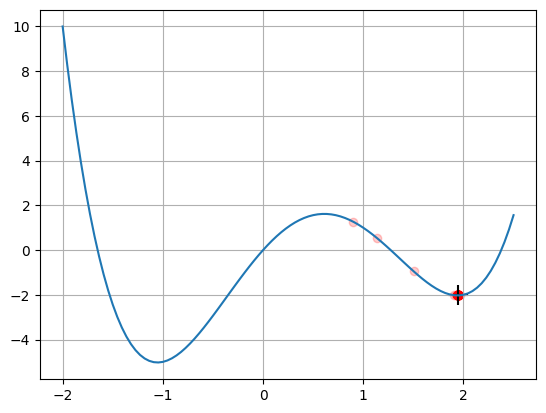

Minimum is:  0.146820526099863
0.146820526099863


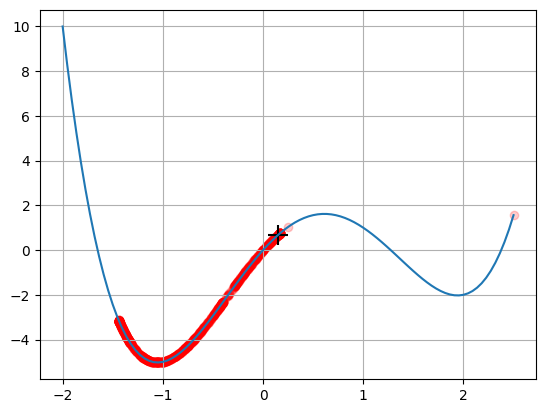

In [ ]:
import sympy as sp

def optimal_function(x):
    return x**4 - 2*x**3 - 3*x**2 + 5*x

def optimal_function_dif(function=optimal_function):
    x_func = sp.symbols('x')
    func = function(x_func)  # Evaluate the function at x_func
    return sp.diff(func, x_func)

def gradient_descent(initial, alpha, iter=1000):
    funcdif = optimal_function_dif()

    xs = np.array([initial])

    for n in range(iter):
        dx = -alpha * funcdif.subs('x', xs[-1])  # Substitute the value of x
        xs = np.append(xs, xs[-1] + dx)
    return xs

x = np.linspace(-2, 2.5, 100)
y = optimal_function(x)

feature = np.array([])
x_gd = gradient_descent(0.9, 0.1, 100)

plt.plot(x, y)
plt.scatter(x_gd, optimal_function(x_gd), c='r',alpha = 0.2)
plt.scatter(x_gd[-1], optimal_function(x_gd[-1]), marker='+', s=200, c='k')
print('Minimum is: ',x_gd[-1])
plt.grid()
plt.show()

x_gd = gradient_descent(2.5, 0.15, 1000)

plt.plot(x, y)
plt.scatter(x_gd, optimal_function(x_gd), c='r', alpha = 0.2)
plt.scatter(x_gd[-1], optimal_function(x_gd[-1]), marker='+', s=200, c='k')
print('Minimum is: ',x_gd[-1])
print(x_gd[-1])
plt.grid()
plt.show()


**Problems and solution:**

Sometime we get lucky, and errors in our discrete implementation lead us to the minimum. But this is not guaranteed! The simple, non-physics based gradient descent with small timestep (first plot) works. The one with large timestep (second plot) works as well, though it overshoots. Our physics-based one (third plot) jumps around.

*   Actually, if our discrete time stepping accurately modeled the equations of
motion of a ball on the potential energy surface, the physics-based method would never converge, because energy is conserved (as we've defined it, the system is frictionless)! Rather, the ball would roll back and forth forever.  We need to add a friction term, which we'll parameterize by a number damp $< 1$:

<p align="center">
 $ damp = \frac{1}{1+\beta ^{n+1}} $

*   If the optimal function has many minimun (include local minimum and global minimum), what could you do to make sure your minimizer finds the global minimum, instead of getting stuck in a local minimum?

  ⇒ Use vary random initial guess



[ 2.19592423 -1.75633311  2.52160307  1.87664314  2.67338737  0.17926869
  1.41669687  2.74616945 -1.56840735 -1.29661538 -0.90671884 -1.12794282
 -1.61329261 -0.75341983 -0.77131015 -0.74018596  1.23040451  2.31092543
 -0.3395317   2.67251643  2.77681245  2.12544354  0.53666648  1.24871806
 -0.34376191 -1.33405054  1.28907893  2.20324804 -1.30661696  2.18983707
  1.39238027 -0.76709493  1.6815109   2.12433445 -1.05575278  2.66527373
  1.33361079  0.54207549 -0.89215213  1.13754946  0.26569102 -1.08928159
  2.00038202  2.50809628 -1.97852948  2.5723485  -0.17186972 -0.9541938
 -0.10840671 -0.56639585  1.66530147  1.19972515  1.43072548  1.61446199
  0.3279438   2.94148308 -1.4841739   0.11247251  2.55093597 -0.62719279
  2.70030091  2.69155042 -1.13469316  0.50353076 -1.74058586  2.1689993
 -1.19761728 -1.50016329 -0.50797644 -0.76176101  2.46440087  0.64605703
  1.39511147 -0.77116745 -1.53630504 -1.17248821 -1.10861754  1.88436735
 -0.74014569  2.94745082 -0.61397779 -1.04976599 -1.2

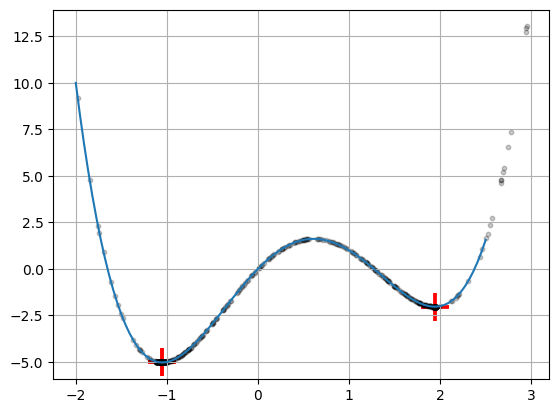

In [ ]:

def gradient_descent(initial, alpha, iter=1000):
    funcdif = optimal_function_dif()

    xs = np.array([initial])

    for n in range(iter):
        dx = -alpha * funcdif.subs('x', xs[-1])  # Substitute the value of x
        if xs[-1] + dx < -2 or xs[-1] + dx >3:
          break
        else:
          xs = np.append(xs, xs[-1] + dx)
    return xs

trajectory = np.array([])
xs = np.random.uniform(-2,3, size=100)
print(xs)
x_gd = []
for init in xs:
  result = gradient_descent(init, 0.08, 100)
  x_gd = np.append(x_gd, gradient_descent(init, 0.08, 1000)[-1])
  trajectory = np.append(trajectory, result)

# x = np.linspace(-3, 8, 100)
# y = optimal_function(x)
plt.plot(x, y)
plt.scatter(x_gd, optimal_function(x_gd), c='r', marker = '+', s = 400)
plt.scatter(trajectory, optimal_function(trajectory), c='k', s=10, alpha = 0.21)
print('Minimum is: ',np.min(x_gd))
plt.grid()
plt.show()

In [ ]:
print(trajectory.size)

5050


# Multivariable gradient descent

---



In [ ]:
import sympy as sp

def optimal_function(x, y):
    return x**3 -8*x**2+x + y**3 - 8*y**2

def optimal_dif_x(function=optimal_function):
    x_func, y_func = sp.symbols('x y')  # Define both symbols
    func = function(x_func, y_func)    # Evaluate the function at x and y
    return sp.diff(func, x_func)       # Calculate the partial derivative with respect to x

def optimal_dif_y(function=optimal_function):
    x_func, y_func = sp.symbols('x y')  # Define both symbols
    func = function(x_func, y_func)    # Evaluate the function at x and y
    return sp.diff(func, y_func)       # Calculate the partial derivative with respect to y

def gradient_descent(initial, alpha, iterations=1000):
    dif_x = optimal_dif_x()
    dif_y = optimal_dif_y()

    xy = initial
    for n in range(iterations):
        dx = dif_x.subs('x', xy[0]).subs('y', xy[1])
        dy = dif_y.subs('x', xy[0]).subs('y', xy[1])
        gradient = np.array([dx,dy])
        xy = xy - alpha * gradient
    return xy

initial = np.array([1, 1])
y_gd = gradient_descent(initial=initial, alpha=0.1, iterations=1000)

print(y_gd)


[5.27008322530222 5.33333333333333]


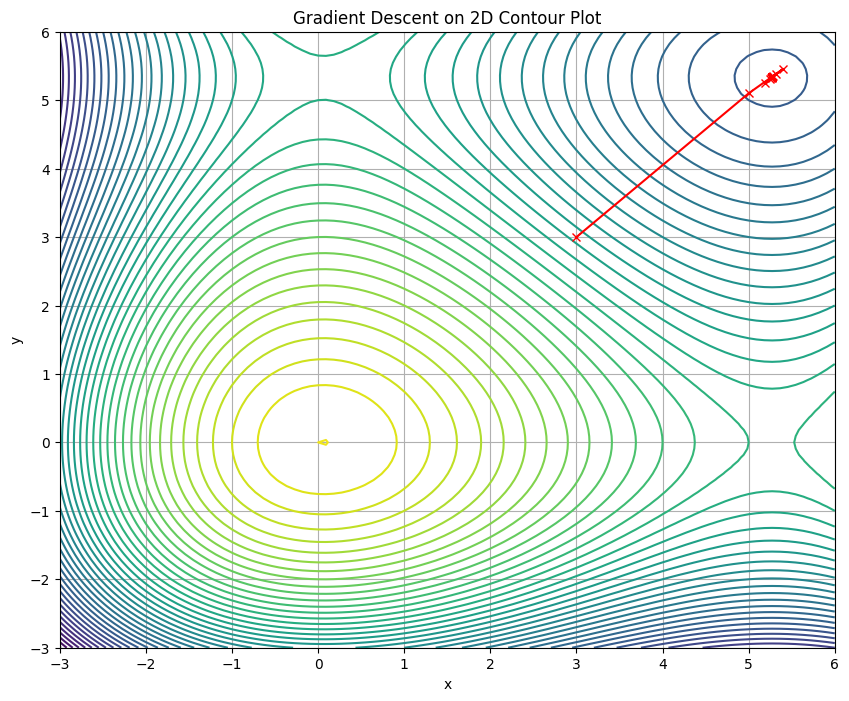

In [ ]:

def gradient_descent(initial, alpha, iterations=1000):
    dif_x = optimal_dif_x()
    dif_y = optimal_dif_y()

    xy = initial
    trajectory = [xy]
    for n in range(iterations):
        dx = dif_x.subs('x', xy[0]).subs('y', xy[1])
        dy = dif_y.subs('x', xy[0]).subs('y', xy[1])
        gradient = np.array([dx, dy])
        xy = xy - alpha * gradient
        trajectory.append(xy)
    return np.array(trajectory)

initial = np.array([3, 3])
alpha = 0.1
iterations = 100
trajectory = gradient_descent(initial=initial, alpha=alpha, iterations=iterations)

# Creating the contour plot on the 3D surface
x = np.linspace(-3, 6, 100)
y = np.linspace(-3, 6, 100)
X, Y = np.meshgrid(x, y)
Z = optimal_function(X, Y)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=40, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], color='r', marker='x')
plt.title("Gradient Descent on 2D Contour Plot")
plt.xlabel("x")
plt.ylabel("y")
# plt.colorbar()
plt.grid()
plt.show()

In [ ]:
x = np.linspace(-3,6,100)
y = np.linspace(-3,6,100)
x, y = np.meshgrid(x, y)
z = optimal_function(x,y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

plt.contour(x, y, z, levels=40, colors='black')
plt.grid()
plt.xlabel('X Label')
plt.ylabel('Y Label')
# plt.title('Contour Plot of z = x^2 + y^2 + 1')
plt.show()



1000 [4.32835921 4.92275182]
2000 [4.2615901  4.98201454]
3000 [4.20968683 5.02808268]
4000 [4.16933958 5.06389397]
5000 [4.13797547 5.09173204]
6000 [4.11359442 5.11337209]
7000 [4.09464171 5.13019408]
8000 [4.07990873 5.14327073]
9000 [4.06845598 5.15343593]
10000 [4.05955313 5.16133789]


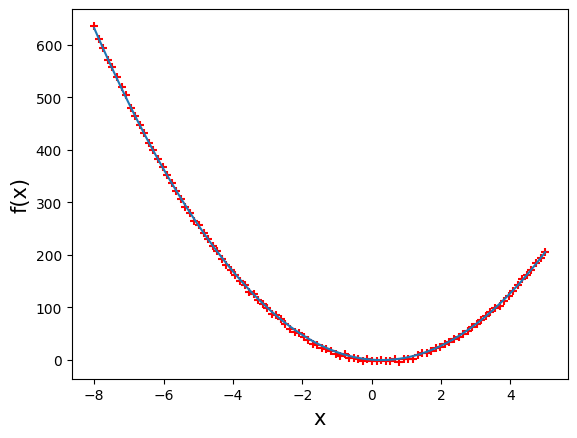

In [ ]:
def f(x, a=4.3, b=5):
    return a * x**2 + b * x **2 - b*x

def fgrad(x, a, b):
    der = np.zeros(2)
    der[0] = x**2
    der[1] = x**2 -x
    return der

def f_var(x, y, init):
    sigma = np.std(y)
    d = 0
    a, b = init
    y_hat = f(x, a, b)
    for i in range(len(y)):
        d += (y[i] - y_hat[i]) ** 2 / (sigma ** 2)
    return d

def fgrad_var(x, y, init):
    d = np.zeros(2)
    a, b = init
    sigma = np.std(y)
    y_hat = f(x, a, b)
    for i in range(len(x)):
        d += 2 * (y[i] - y_hat[i]) * fgrad(x[i], a, b) / (sigma ** 2)
    return d

def custmin(fun, init, args=(), maxfev=None, alpha=0.01, maxiter=10000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the function above."""
    bestx = init
    bestf = fun(init)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        if niter % 1000 == 0:
            print(niter, bestx)
        # the next 2 lines are gradient descent
        step = alpha * fgrad_var(x, y, bestx)  # Corrected to use fgrad_var
        bestx = bestx + step

        bestf = fun(bestx)
        funcalls += 1
        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=bestf, x=bestx, nit=niter, nfev=funcalls, success=(niter > 1))

def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

x = np.linspace(-8, 5, 100)
y = f(x) + np.random.normal(-2, 2, x.size)
x0 = np.array([1, 1])
ps = [x0]
sol = opt.minimize(f, x0, args=(x, y), method=custmin, callback=reporter)  # Changed to use f_var

plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)
plt.scatter(x,y, marker = '+', c = 'r')
plt.plot(x, f(x, sol.x[0], sol.x[1]))
plt.show()

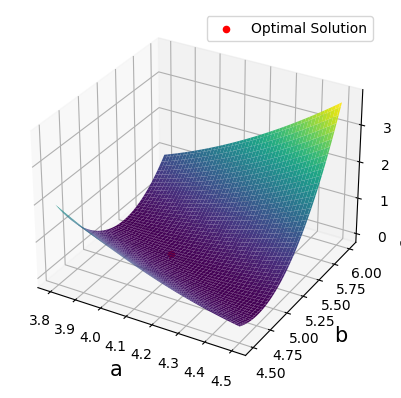

In [ ]:
# Create a grid of a and b values
a_range = np.linspace(3.8, 4.5, 100)
b_range = np.linspace(4.5, 6, 100)
A, B = np.meshgrid(a_range, b_range)
Z = np.empty_like(A)

# Compute the value of f_var for each combination of a and b
for i in range(len(a_range)):
    for j in range(len(b_range)):
        Z[j,i] = f_var(x, y, [a_range[i], b_range[j]])

# Perform optimization
# sol = opt.minimize(lambda ab: f_var(x, y, ab), x0, method=custmin)

# Compute the value of f_var at the optimal solution
optimal_f_var = f_var(x, y, sol.x)

# Create a 3D contour plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, Z, cmap='viridis')
ax.set_xlabel('a', fontsize=15)
ax.set_ylabel('b', fontsize=15)
ax.set_zlabel('f_var(x, y, [a, b])', fontsize=15)
ax.scatter(sol.x[0], sol.x[1], optimal_f_var, c='r', marker='o', label='Optimal Solution')
ax.legend()
plt.show()

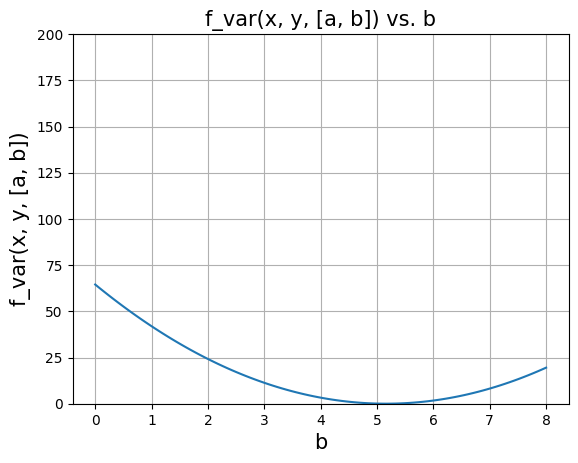

In [ ]:
optimal_a, optimal_b = sol.x


# Vary the b parameter while keeping a constant
b_range = np.linspace(0, 8, 100)
f_var_values = []

for b in b_range:
    f_var_val = f_var(x, y, [optimal_a, b])
    f_var_values.append(f_var_val)

# Plot the f_var values against b
plt.plot(b_range, f_var_values)
plt.xlabel('b', fontsize=15)
plt.ylabel('f_var(x, y, [a, b])', fontsize=15)
plt.title('f_var(x, y, [a, b]) vs. b', fontsize=15)
plt.grid()
plt.ylim(0,200)
plt.show()